# Regression Assignment:

# Step 1: Acquire the data and create our environment

In [97]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading House _dataset.csv

In [98]:
train = pd.read_csv('houses_dataset.csv')
train.count

<bound method DataFrame.count of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour U

# Step 2: Explore the data and its atribute fields

In [73]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Pre-Processing

# Check for skewness of our Target feature

Skew is: 1.8828757597682129


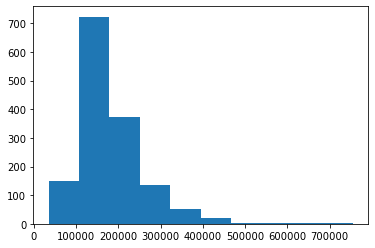

In [99]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train["SalePrice"])
plt.show()

skew is 0.12133506220520406


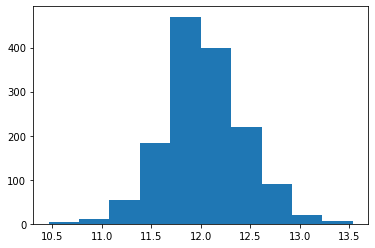

In [100]:
target = np.log(train.SalePrice)
print('skew is', target.skew())
plt.hist(target)
plt.show()

# Working with Numeric Features

# Finding the most Positive and Negative correlation

In [101]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Positive Correlation:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    

#we noticed that the median sales price strictly increases as Overall Quality increases.

In [102]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', 
                                  aggfunc=np.median)
print(quality_pivot)

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


# handling Null values

# Lets find/count null values in each column

In [103]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:5])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

             Null Count
Feature                
PoolQC             1453
MiscFeature        1406
Alley              1369
Fence              1179
FireplaceQu         690


# handling missing value interpolate(): Fill NaN values using an interpolation method.
#dropna(): Remove missing values.

In [104]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


# Wrangling the non-numeric Features

In [111]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [112]:
print(categoricals["Street"].value_counts())

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [113]:
print(categoricals["RoofStyle"].value_counts())

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


# Street column is categorical data, We need to convert it to be a numeric

In [114]:
street_names = {"Street":     {"Pave": 1, "Grvl": 2}}

In [115]:
categoricals = categoricals.replace(street_names)
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,1,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,1,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [117]:
categoricals["RoofStyle"] = categoricals["RoofStyle"].astype('category')
categoricals.RoofStyle.dtypes

CategoricalDtype(categories=['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], ordered=False)

In [118]:
categoricals["RoofStyle_cat"] = categoricals["RoofStyle"].cat.codes
categoricals.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,RoofStyle_cat
0,RL,1,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
1,RL,1,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
2,RL,1,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1
3,RL,1,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,1
4,RL,1,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,1


In [119]:
train.Street.head()

0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
Name: Street, dtype: object

In [120]:
categoricals.Street.head()

0    1
1    1
2    1
3    1
4    1
Name: Street, dtype: int64

In [121]:
categoricals.RoofStyle_cat.value_counts()

1    1141
3     286
0      13
2      11
4       7
5       2
Name: RoofStyle_cat, dtype: int64

# Using LabelEncoder

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train.KitchenQual = le.fit_transform(train.KitchenQual.astype(str))

In [123]:
list(le.classes_)

['Ex', 'Fa', 'Gd', 'TA']

In [124]:
print(train.KitchenQual.value_counts())
print(train.KitchenQual.isnull().sum())

3    735
2    586
0    100
1     39
Name: KitchenQual, dtype: int64
0


In [125]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# plot GaurageArea field and SalePrice in scatter plot

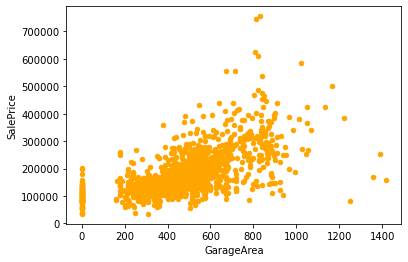

In [126]:
splot = train.plot.scatter(x ='GarageArea',
                   y = 'SalePrice',
                  c = 'Orange')

In [127]:
train = (train[train['GarageArea'] < 1100])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [128]:
train = (train[train['SalePrice'] < 500000])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


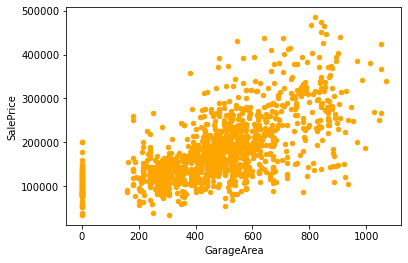

In [129]:
splot = train.plot.scatter(x ='GarageArea',
                   y = 'SalePrice',
                  c = 'Orange')

# Handling Null values 

In [130]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


In [131]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False)[:])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

               Null Count
Feature                  
Id                      0
WoodDeckSF              0
KitchenAbvGr            0
KitchenQual             0
TotRmsAbvGrd            0
Fireplaces              0
GarageYrBlt             0
GarageCars              0
GarageArea              0
OpenPorchSF             0
HalfBath                0
EnclosedPorch           0
3SsnPorch               0
ScreenPorch             0
PoolArea                0
MiscVal                 0
MoSold                  0
YrSold                  0
BedroomAbvGr            0
FullBath                0
MSSubClass              0
BsmtFinSF1              0
LotFrontage             0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
YearRemodAdd            0
MasVnrArea              0
BsmtFinSF2              0
BsmtHalfBath            0
BsmtUnfSF               0
TotalBsmtSF             0
1stFlrSF                0
2ndFlrSF                0
LowQualFinSF            0
GrLivArea   

# create a regression model and plot the regression line between the two features.

In [132]:
from sklearn.model_selection import train_test_split
y  = np.array(data.SalePrice).reshape((-1, 1))
X = np.array(data.GarageArea).reshape((-1, 1))
 #=  np.array(SP))
 #=  np.array(GA).reshape((-1, 1))


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = model.predict(X_test)

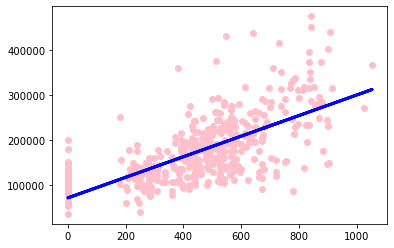

In [136]:
plt.scatter(X_test, y_test, color='Pink')
plt.plot(X_test, y_pred, color='blue', linewidth=3)



In [137]:
#train.info()
#Check for skewness of our Target feature

In [138]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# top 5 most correlated features to the target label(SalePrice) and then build a model using those 5 features.

In [139]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
print("\nNegative Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Positive Correlation:
SalePrice        1.000000
OverallQual      0.804744
GrLivArea        0.704537
GarageCars       0.657690
GarageArea       0.646557
TotalBsmtSF      0.625813
1stFlrSF         0.605678
FullBath         0.557711
YearBuilt        0.542719
YearRemodAdd     0.530450
TotRmsAbvGrd     0.514314
GarageYrBlt      0.506560
Fireplaces       0.472811
MasVnrArea       0.443521
BsmtFinSF1       0.370133
LotFrontage      0.361086
WoodDeckSF       0.332803
OpenPorchSF      0.330193
2ndFlrSF         0.298803
HalfBath         0.284019
LotArea          0.255686
BsmtFullBath     0.235290
BsmtUnfSF        0.226630
BedroomAbvGr     0.174819
ScreenPorch      0.099106
MoSold           0.080151
3SsnPorch        0.054606
PoolArea         0.037114
BsmtFinSF2      -0.013021
MiscVal         -0.019018
LowQualFinSF    -0.023663
Id              -0.032030
BsmtHalfBath    -0.032377
YrSold          -0.034532
OverallCond     -0.071809
MSSubClass      -0.082835
EnclosedPorch   -0.128958
KitchenAbvGr    

In [144]:
new_train = train[["OverallQual","GrLivArea", "GarageCars",  "GarageArea", "TotalBsmtSF" ]]
#[['a', 'b']]
new_train.describe()
new_train.head(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
0,7,1710,2,548,856
1,6,1262,2,460,1262


In [145]:
y = np.log(train.SalePrice)
X = new_train


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = model.predict(X_test)

In [150]:
y_pred

array([12.39317146, 12.54848273, 12.41154855, 12.63983464, 12.43312375,
       12.43542432, 12.21526756, 12.22864612, 12.17585039, 11.71548562,
       12.57161675, 12.05879012, 11.69838324, 12.23313895, 12.39369472,
       12.21139835, 11.79318552, 12.26834999, 11.52018436, 12.46081828,
       12.4249783 , 11.47900662, 12.15370976, 11.79719578, 11.5700343 ,
       11.93241038, 11.84134384, 12.04852477, 11.92649548, 12.25185247,
       10.9937557 , 12.15728329, 12.3905305 , 11.88976066, 11.59580315,
       11.89576759, 11.68285738, 11.57735775, 12.32862117, 11.36481267,
       12.16651535, 11.67872877, 11.71713117, 12.03862635, 12.66852546,
       12.15354858, 12.22978539, 12.15810291, 12.41910915, 12.17418109,
       11.95306274, 12.31347737, 12.08949205, 11.87521701, 11.97044556,
       11.99714558, 11.80341526, 12.61340237, 12.12156736, 12.2663873 ,
       13.12611869, 12.11883335, 11.54769629, 12.35127814, 12.20070498,
       11.86703483, 12.11973948, 11.74362041, 11.69223001, 12.51

# Evaluate all the models using MAE, MSE, RMSE and R2 score

In [151]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.8208809229934553
mean_sqrd_error is== 0.0271971392718448
root_mean_squared error of is== 0.1649155519405153


In [152]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.11970401378030526

# PCA

In [154]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)


In [164]:
X_new = pca.fit_transform(X)
#pca.fit_transform(X)
X_new

array([[ 9.22439543e+01, -2.63589040e+02, -8.70979829e+01,
        -7.28059673e-01, -8.13720010e-02],
       [-8.70773281e+01,  3.11130777e+02,  1.69469757e+01,
        -7.61917660e-03,  2.88549374e-01],
       [ 2.01395532e+02, -2.46324972e+02, -1.22591505e+02,
        -4.72329407e-01, -2.53539957e-01],
       ...,
       [ 7.01479591e+02, -3.88125751e+02,  3.43547392e+02,
        -4.38628800e-01, -2.35616396e-01],
       [-3.82790852e+02,  2.38324388e+02,  1.69808307e+02,
         2.69133441e-01,  8.51207577e-03],
       [-1.35518006e+02,  2.92631727e+02,  1.93697330e+02,
         6.64982816e-01, -9.33230774e-02]])

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=42)

In [166]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [167]:
y_pred_new = model.predict(X_test)

In [169]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[6.77589718e-01 2.60372353e-01 6.20356402e-02 2.05743573e-06
 2.31583415e-07]
[2.10542782e+04 1.30513185e+04 6.37055967e+03 3.66876667e+01
 1.23086573e+01]


#  PCA Regression Evaluation ( MAE, MSE, RMSE and R2 score )

In [170]:
#Evaluate all the models using MAE, MSE, RMSE and R2 score
score=r2_score(y_test,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_pred_new))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_pred_new)))
mean_absolute_error(y_test,y_pred_new)

r2 socre is  0.8208809229934553
mean_sqrd_error is== 0.027197139271845704
root_mean_squared error of is== 0.16491555194051805


0.11970401378031018